## Case Predictive Model for Insurance

Implementation of machine learning models and comparing performances using an anonymized data set regarding insurance acceptance.

In [1]:
## Install
!pip install -q xgboost

In [2]:
## Imports
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, roc_curve
import warnings
warnings.filterwarnings('ignore')

#### Carregamento dos dados

In [3]:
data = pd.read_csv('dataset.csv')

In [4]:
data.shape

(11500, 179)

In [5]:
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,LABEL_TARGET
0,135,190,229,223,192,125,55,-9,-33,-38,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,False
1,386,382,356,331,320,315,307,272,244,232,...,164,150,146,152,157,156,154,143,129,True
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,57,64,48,19,-12,-30,-35,-35,-36,False
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,False
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,4,2,-12,-32,-41,-65,-83,-89,-73,False


#### Análise Exploratória e Limpeza dos Dados

In [6]:
### Resumo Estatístico
data.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178
count,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.00000,11500.00000,11500.000000,...,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000
mean,-11.581391,-10.911565,-10.187130,-9.143043,-8.009739,-7.003478,-6.502087,-6.68713,-6.55800,-6.168435,...,-9.498870,-10.145739,-11.630348,-12.943478,-13.668870,-13.363304,-13.045043,-12.705130,-12.426000,-12.195652
std,165.626284,166.059609,163.524317,161.269041,160.998007,161.328725,161.467837,162.11912,162.03336,160.436352,...,165.235574,164.652883,166.149790,168.554058,168.556486,167.257290,164.241019,162.895832,162.886311,164.852015
min,-1839.000000,-1838.000000,-1835.000000,-1845.000000,-1791.000000,-1757.000000,-1832.000000,-1778.00000,-1840.00000,-1867.000000,...,-1860.000000,-1867.000000,-1865.000000,-1642.000000,-1723.000000,-1866.000000,-1863.000000,-1781.000000,-1727.000000,-1829.000000
25%,-54.000000,-55.000000,-54.000000,-54.000000,-54.000000,-54.000000,-54.000000,-55.00000,-55.00000,-54.000000,...,-55.000000,-55.000000,-56.000000,-56.000000,-56.000000,-55.000000,-56.000000,-55.000000,-55.000000,-55.000000
50%,-8.000000,-8.000000,-7.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.00000,-7.00000,-7.000000,...,-8.000000,-9.000000,-10.000000,-10.000000,-10.000000,-10.000000,-9.000000,-9.000000,-9.000000,-9.000000
75%,34.000000,35.000000,36.000000,36.000000,35.000000,36.000000,35.000000,36.00000,36.00000,35.250000,...,35.000000,34.000000,34.000000,33.000000,33.000000,34.000000,34.000000,34.000000,34.000000,34.000000
max,1726.000000,1713.000000,1697.000000,1612.000000,1518.000000,1816.000000,2047.000000,2047.00000,2047.00000,2047.000000,...,2047.000000,1777.000000,1472.000000,1319.000000,1436.000000,1733.000000,1958.000000,2047.000000,2047.000000,1915.000000


In [7]:
## Valores Ausentes
data.isnull().values.any()

False

In [8]:
data.isnull().sum().sort_values(ascending=False)

X1              0
X135            0
X115            0
X116            0
X117            0
               ..
X62             0
X63             0
X64             0
X65             0
LABEL_TARGET    0
Length: 179, dtype: int64

In [9]:
## Valores Duplicados
data.columns.duplicated().sum()

0

In [10]:
data.duplicated().sum()

0

#### Prepara colunas

In [11]:
len(data.columns)

179

In [12]:
# Extrai a lista de colunas
list_columns = data.columns.tolist()

In [13]:
# Colunas das variáveis de entrada (input)
columns_entry = list_columns[0:178]

In [14]:
print(columns_entry)

['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31', 'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41', 'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51', 'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59', 'X60', 'X61', 'X62', 'X63', 'X64', 'X65', 'X66', 'X67', 'X68', 'X69', 'X70', 'X71', 'X72', 'X73', 'X74', 'X75', 'X76', 'X77', 'X78', 'X79', 'X80', 'X81', 'X82', 'X83', 'X84', 'X85', 'X86', 'X87', 'X88', 'X89', 'X90', 'X91', 'X92', 'X93', 'X94', 'X95', 'X96', 'X97', 'X98', 'X99', 'X100', 'X101', 'X102', 'X103', 'X104', 'X105', 'X106', 'X107', 'X108', 'X109', 'X110', 'X111', 'X112', 'X113', 'X114', 'X115', 'X116', 'X117', 'X118', 'X119', 'X120', 'X121', 'X122', 'X123', 'X124', 'X125', 'X126', 'X127', 'X128', 'X129', 'X130', 'X131', 'X132', 'X133', 'X134', 'X135', 'X136', 'X137', 'X138', 'X1

In [15]:
# Função calcula a prevalência da classe positiva (label = 1)
def calc_prevalencia(y_actual):
    return sum(y_actual) / len(y_actual)

In [16]:
print("Prevalência da classe positiva: %.3f"% calc_prevalencia(data["LABEL_TARGET"].values))

Prevalência da classe positiva: 0.200


In [17]:
## Verificando variável alvo
count_v = data['LABEL_TARGET'].value_counts()
count_v

LABEL_TARGET
False    9200
True     2300
Name: count, dtype: int64

In [18]:
total_v = data['LABEL_TARGET'].value_counts().sum()
total_v

11500

In [19]:
## Percentual variável alvo
perc = count_v/total_v *100
perc

LABEL_TARGET
False    80.0
True     20.0
Name: count, dtype: float64

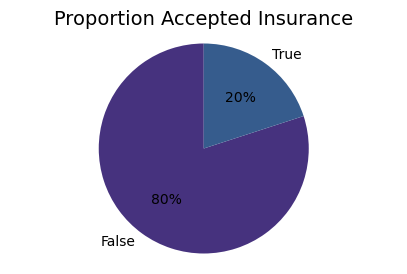

In [20]:
fig, ax = plt.subplots(figsize = (5, 3))

counts = data['LABEL_TARGET'].value_counts()
labels = counts.index.tolist()

colors = sns.color_palette('viridis')

ax.pie(counts, labels = labels, colors = colors, autopct= '%.0f%%', startangle=90)

ax.set_title('Proportion Accepted Insurance', fontsize = 14)

ax.axis('equal')

plt.show()

In [22]:
# Converte de string para valor numérico
data["LABEL_TARGET"] = data["LABEL_TARGET"].astype(int)

In [23]:
data['LABEL_TARGET'].value_counts()

LABEL_TARGET
0    9200
1    2300
Name: count, dtype: int64

#### Divisão dos dados

In [24]:
#Amostra aleatória
data_am = data.sample(n = len(data))

In [25]:
data_am

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,LABEL_TARGET
4803,47,37,30,22,8,-14,-30,-35,-45,-55,...,14,6,-5,-12,-13,-8,-13,-17,-13,0
10448,-46,-12,17,38,50,50,50,48,59,55,...,27,23,26,36,39,46,36,14,-9,0
10659,-6,-24,-55,-52,-62,-48,-35,-27,-43,-61,...,-94,-86,-63,-47,-25,-11,-37,-53,-67,0
8035,-103,-108,-110,-110,-115,-117,-122,-124,-126,-131,...,-12,-13,3,14,28,38,47,49,51,0
5452,-30,-24,-20,-14,-15,-7,-10,-15,-20,-22,...,-21,-20,-17,-19,-23,-25,-25,-18,-14,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10318,-5,56,132,197,241,262,259,222,157,89,...,-109,172,264,289,269,188,116,50,-8,1
7615,-228,-163,-95,-35,31,81,131,158,160,116,...,-149,-130,-107,-78,-57,-21,5,21,33,0
9261,-28,0,11,8,21,23,-13,-57,-79,-78,...,-104,-153,-171,-193,-200,-187,-159,-104,-32,0
5980,-156,-116,-73,-40,7,-1,15,-27,-46,-69,...,238,218,166,134,141,122,103,58,39,0


In [26]:
# Ajuste de índices
data_am = data_am.reset_index(drop=True)

In [27]:
data_am

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,LABEL_TARGET
0,47,37,30,22,8,-14,-30,-35,-45,-55,...,14,6,-5,-12,-13,-8,-13,-17,-13,0
1,-46,-12,17,38,50,50,50,48,59,55,...,27,23,26,36,39,46,36,14,-9,0
2,-6,-24,-55,-52,-62,-48,-35,-27,-43,-61,...,-94,-86,-63,-47,-25,-11,-37,-53,-67,0
3,-103,-108,-110,-110,-115,-117,-122,-124,-126,-131,...,-12,-13,3,14,28,38,47,49,51,0
4,-30,-24,-20,-14,-15,-7,-10,-15,-20,-22,...,-21,-20,-17,-19,-23,-25,-25,-18,-14,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11495,-5,56,132,197,241,262,259,222,157,89,...,-109,172,264,289,269,188,116,50,-8,1
11496,-228,-163,-95,-35,31,81,131,158,160,116,...,-149,-130,-107,-78,-57,-21,5,21,33,0
11497,-28,0,11,8,21,23,-13,-57,-79,-78,...,-104,-153,-171,-193,-200,-187,-159,-104,-32,0
11498,-156,-116,-73,-40,7,-1,15,-27,-46,-69,...,238,218,166,134,141,122,103,58,39,0


In [28]:
# Amostra de 30% dos dados
data_am_30 = data_am.sample(frac = 0.30)

In [29]:
data_am_30

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,LABEL_TARGET
11094,60,59,53,47,34,28,20,34,43,57,...,-23,-17,-11,-16,-15,-24,-24,-12,0,0
5205,-38,-48,-50,-30,-11,10,27,32,23,2,...,4,11,14,11,14,22,21,22,27,0
8876,-7,-1,2,-2,1,-1,2,-10,-25,-16,...,-41,-50,-57,-69,-63,-50,-38,-27,-33,0
7620,70,75,82,83,71,78,74,73,80,75,...,-13,-26,-38,-38,-40,-34,-14,-14,-12,0
3522,20,-23,-48,-50,-44,-33,-35,-45,-57,-74,...,-4,15,20,15,25,33,38,31,13,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8278,86,134,186,232,275,306,331,352,363,360,...,418,414,411,403,397,390,381,367,354,1
1406,11,19,25,24,25,12,8,3,8,-2,...,-74,-55,-41,-33,-33,-33,-42,-53,-60,0
10904,-448,-464,-466,-433,-408,-374,-389,-384,-387,-289,...,-74,-67,-81,-114,-209,-295,-331,-227,-28,1
2751,-75,-83,-86,-87,-75,-67,-68,-43,-4,11,...,-105,-95,-68,-80,-94,-94,-87,-80,-64,0


In [30]:
print("Tamanho da divisão de validação / teste: %.1f" % (len(data_am_30) / len(data_am)))

Tamanho da divisão de validação / teste: 0.3


In [31]:
# Fazendo a divisão

# Dados de teste
data_teste = data_am_30.sample(frac = 0.5)

# Dados se validação
data_valid = data_am_30.drop(data_teste.index)

# Dados de treino
data_treino = data_am.drop(data_am_30.index)

In [32]:
data_teste

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,LABEL_TARGET
2533,43,45,50,55,71,72,72,78,78,81,...,1,12,13,17,24,39,55,65,86,0
5148,25,16,15,12,14,-1,-37,-74,-106,-132,...,49,52,60,68,68,71,72,81,77,0
990,-175,-199,-216,-261,-282,-290,-272,-235,-207,-165,...,5,1,21,25,2,11,18,30,23,0
10657,249,352,422,390,285,65,-137,-264,-219,-33,...,-1151,-733,-298,12,144,-61,-368,-616,-569,1
2485,14,13,13,2,-7,-18,-25,-9,-6,-11,...,-78,-88,-98,-100,-94,-82,-67,-52,-36,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565,-138,-133,-110,-81,-62,-56,-57,-54,-54,-43,...,-91,-107,-116,-99,-75,-53,-34,-10,18,0
7923,-3,-10,-1,5,18,27,34,32,19,23,...,76,85,65,43,16,-3,-3,-1,2,0
11120,30,71,74,76,52,-11,-87,-142,-185,-178,...,-106,-89,-67,-42,-30,-27,-49,-85,-83,0
9701,-20,-28,-34,-37,-39,-37,-35,-30,-31,-25,...,28,17,13,11,6,-2,-18,-34,-54,0


In [33]:
data_valid

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,LABEL_TARGET
5205,-38,-48,-50,-30,-11,10,27,32,23,2,...,4,11,14,11,14,22,21,22,27,0
8876,-7,-1,2,-2,1,-1,2,-10,-25,-16,...,-41,-50,-57,-69,-63,-50,-38,-27,-33,0
7620,70,75,82,83,71,78,74,73,80,75,...,-13,-26,-38,-38,-40,-34,-14,-14,-12,0
6472,-298,-254,-203,-147,-87,-34,-11,-4,8,29,...,-471,-466,-436,-392,-340,-284,-215,-144,-74,1
2722,11,0,-21,-25,-12,-1,21,30,33,31,...,56,29,12,8,8,24,27,41,48,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9482,-1,-3,5,13,18,17,9,7,10,16,...,-10,-5,-5,0,3,7,14,22,26,0
7385,31,40,41,77,92,43,-24,-56,-37,-7,...,-8,-48,-58,-56,-2,29,2,5,36,0
6131,22,7,-6,-10,2,17,41,46,48,50,...,-41,-45,-49,-51,-45,-43,-46,-37,-36,0
18,-89,-93,-95,-103,-109,-109,-78,-6,86,179,...,-137,-131,-72,-10,19,29,62,108,142,1


In [34]:
data_treino

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,LABEL_TARGET
1,-46,-12,17,38,50,50,50,48,59,55,...,27,23,26,36,39,46,36,14,-9,0
2,-6,-24,-55,-52,-62,-48,-35,-27,-43,-61,...,-94,-86,-63,-47,-25,-11,-37,-53,-67,0
4,-30,-24,-20,-14,-15,-7,-10,-15,-20,-22,...,-21,-20,-17,-19,-23,-25,-25,-18,-14,0
5,53,67,74,82,88,93,96,104,107,107,...,-34,-32,-27,-17,-11,-22,-32,-42,-57,0
6,128,117,72,45,7,-11,-19,-24,-13,-5,...,27,46,41,28,12,22,29,15,26,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11493,-2,-13,-17,-15,-19,-23,-33,-37,-43,-46,...,-59,-68,-89,-113,-125,-127,-119,-107,-89,0
11494,-99,-115,-123,-112,-92,-74,-58,-37,-26,-13,...,-47,-64,-81,-105,-121,-114,-88,42,142,1
11495,-5,56,132,197,241,262,259,222,157,89,...,-109,172,264,289,269,188,116,50,-8,1
11496,-228,-163,-95,-35,31,81,131,158,160,116,...,-149,-130,-107,-78,-57,-21,5,21,33,0


In [35]:
# Calculo da prevalência de cada subconjunto
print(
    "Teste(n = %d): %.3f"
    % (len(data_teste), calc_prevalencia(data_teste.LABEL_TARGET.values))
)
print(
    "Validação(n = %d): %.3f"
    % (len(data_valid), calc_prevalencia(data_valid.LABEL_TARGET.values))
)
print(
    "Treino(n = %d): %.3f"
    % (len(data_treino), calc_prevalencia(data_treino.LABEL_TARGET.values))
)

Teste(n = 1725): 0.217
Validação(n = 1725): 0.191
Treino(n = 8050): 0.198


### Balanceamento

##### Undersampling

In [36]:
data_teste.shape

(1725, 179)

In [37]:
data_valid.shape

(1725, 179)

In [38]:
data_treino.shape

(8050, 179)

In [39]:
data_treino.LABEL_TARGET.value_counts()

LABEL_TARGET
0    6454
1    1596
Name: count, dtype: int64

In [40]:
indice = data_treino.LABEL_TARGET == 1

In [41]:
# Define valores positivos e negativos do índice
data_train_pos = data_treino.loc[indice]
data_train_neg = data_treino.loc[~indice]

In [42]:
# Valor mínimo de registros entre classe positiva e negativa
valor_minimo = np.min([len(data_train_pos), len(data_train_neg)])

In [43]:
valor_minimo

1596

In [44]:
# Obtém valores aleatórios para o dataset de treino
data_treino_final = pd.concat([data_train_pos.sample(n = valor_minimo, random_state = 69), 
                             data_train_neg.sample(n = valor_minimo, random_state = 69)], 
                            axis = 0, 
                            ignore_index = True)

In [45]:
# Amostragem aleatória do dataset de treino
df_treino_final = data_treino_final.sample(n = len(data_treino_final), random_state = 69).reset_index(drop = True)

In [46]:
data_treino_final.shape

(3192, 179)

In [47]:
data_treino_final.LABEL_TARGET.value_counts()

LABEL_TARGET
1    1596
0    1596
Name: count, dtype: int64

In [48]:
# Balanceamento do conjunto de dados
print('Balanceamento em Treino(n = %d): %.3f'%(len(data_treino_final), 
                                               calc_prevalencia(data_treino_final.LABEL_TARGET.values)))

Balanceamento em Treino(n = 3192): 0.500


#### Prepara Matrizes

In [49]:
# Prepara a Matrix X
X_treino = data_treino_final[columns_entry].values
X_valid = data_valid[columns_entry].values
X_teste = data_teste[columns_entry].values

In [50]:
# Prepara a Matriz Y
y_treino = df_treino_final['LABEL_TARGET'].values
y_valid = data_valid['LABEL_TARGET'].values
y_teste = data_teste['LABEL_TARGET'].values

In [51]:
# Print
print('Shape dos dados de treino:', X_treino.shape, y_treino.shape)
print('Shape dos dados de validação:', X_valid.shape, y_valid.shape)
print('Shape dos dados de teste:', X_teste.shape, y_teste.shape)

Shape dos dados de treino: (3192, 178) (3192,)
Shape dos dados de validação: (1725, 178) (1725,)
Shape dos dados de teste: (1725, 178) (1725,)


In [52]:
type(X_treino)

numpy.ndarray

In [53]:
X_treino

array([[-230, -268, -243, ...,  -42, -148, -197],
       [ 210,  174,  165, ...,  280,  335,  398],
       [-270, -238, -187, ...,   27,   -5,  -41],
       ...,
       [ -26,  -19,  -15, ...,   47,   55,   59],
       [  26,   37,   38, ...,   73,   77,   91],
       [ 143,   80,   28, ...,  148,  193,  218]], dtype=int64)

#### Padronização dos Dados

In [54]:
# Objeto
scaler = StandardScaler()

In [55]:
# Fit
scaler.fit(X_treino)

StandardScaler()

In [56]:
# Aplica a padronização em nossas matrizes de dados
X_treino_tf = scaler.transform(X_treino)
X_valid_tf = scaler.transform(X_valid)

In [57]:
X_treino_tf

array([[-0.86973236, -1.033363  , -0.95655519, ..., -0.10426067,
        -0.55486897, -0.75356243],
       [ 0.9244516 ,  0.77148736,  0.73935499, ...,  1.23372084,
         1.47350215,  1.71411459],
       [-1.03283999, -0.91086185, -0.72378321, ...,  0.18244966,
         0.04566327, -0.10657484],
       ...,
       [-0.03788343, -0.01660341, -0.00884068, ...,  0.2655541 ,
         0.29763484,  0.30816079],
       [ 0.17415649,  0.21206541,  0.21146138, ...,  0.37358987,
         0.39002441,  0.44087619],
       [ 0.65124631,  0.3876504 ,  0.16989495, ...,  0.68523152,
         0.87716944,  0.96759045]])

#### Modelagem Preditiva

In [58]:
# Função para calcular a especificidade
def calc_specif(y_actual, y_pred, thresh):
    return sum((y_pred < thresh) & (y_actual == 0)) / sum(y_actual == 0)

In [59]:
# Função para gerar relatório de métricas
def print_report(y_actual, y_pred, thresh):
    
    auc = roc_auc_score(y_actual, y_pred)
    accuracy = accuracy_score(y_actual, (y_pred > thresh))
    recall = recall_score(y_actual, (y_pred > thresh))
    precision = precision_score(y_actual, (y_pred > thresh))
    specificity = calc_specif(y_actual, y_pred, thresh)
    
    print('AUC:%.3f'%auc)
    print('Acurácia:%.3f'%accuracy)
    print('Recall:%.3f'%recall)
    print('Precisão:%.3f'%precision)
    print('Especificidade:%.3f'%specificity)
    print(' ')
    
    return auc, accuracy, recall, precision, specificity 

In [60]:
thresh = 0.5

#### Versao 1 - Regressão Logistica (Sem otimização de parâmetros)

In [61]:
# Cria o classificador (objeto)
lr1 = LogisticRegression()

In [62]:
# Treina e cria o modelo
model_v1 = lr1.fit(X_treino_tf, y_treino)

In [63]:
# Previsões 
y_train_preds = model_v1.predict_proba(X_treino_tf)[:,1]
y_valid_preds = model_v1.predict_proba(X_valid_tf)[:,1]

In [64]:
print('Modelo de Regressão Logística (Sem Otimização de Hiperparâmetros)\n')

print('Treinamento:\n')
lr1_train_auc, lr1_train_accuracy, lr1_train_recall, lr1_train_precision, lr1_train_specificity = print_report(y_treino, 
                                                                                                                   y_train_preds, 
                                                                                                                   thresh)

print('Validação:\n')
lr1_valid_auc, lr1_valid_accuracy, lr1_valid_recall, lr1_valid_precision, lr1_valid_specificity = print_report(y_valid, 
                                                                                                                   y_valid_preds, 
                                                                                                                   thresh)

Modelo de Regressão Logística (Sem Otimização de Hiperparâmetros)

Treinamento:

AUC:0.610
Acurácia:0.576
Recall:0.558
Precisão:0.579
Especificidade:0.594
 
Validação:

AUC:0.510
Acurácia:0.510
Recall:0.505
Precisão:0.196
Especificidade:0.511
 


#### Versao 2 - Regressão Logistica (Com otimização de parâmetros)

In [65]:
# Cria o classificador (objeto)
lr2 = LogisticRegression(random_state = 142, solver = 'liblinear')

In [66]:
# Treina e cria o modelo
model_v2 = lr2.fit(X_treino_tf, y_treino)

In [67]:
# Previsões 
y_train_preds = model_v2.predict_proba(X_treino_tf)[:,1]
y_valid_preds = model_v2.predict_proba(X_valid_tf)[:,1]

In [68]:
print('Modelo de Regressão Logística (Com Otimização de Hiperparâmetros)\n')

print('Treinamento:\n')
lr2_train_auc, lr2_train_accuracy, lr2_train_recall, lr2_train_precision, lr2_train_specificity = print_report(y_treino, 
                                                                                                                   y_train_preds, 
                                                                                                                   thresh)

print('Validação:\n')
lr2_valid_auc, lr2_valid_accuracy, lr2_valid_recall, lr2_valid_precision, lr2_valid_specificity = print_report(y_valid, 
                                                                                                                   y_valid_preds, 
                                                                                                                   thresh)


Modelo de Regressão Logística (Com Otimização de Hiperparâmetros)

Treinamento:

AUC:0.610
Acurácia:0.579
Recall:0.564
Precisão:0.581
Especificidade:0.594
 
Validação:

AUC:0.513
Acurácia:0.508
Recall:0.514
Precisão:0.197
Especificidade:0.507
 


#### Versao 3 - Naive Bayes

In [69]:
# Cria o classificador (objeto)
nb = GaussianNB()

In [70]:
# Treina e cria o modelo
model_v3 = nb.fit(X_treino_tf, y_treino)

In [71]:
# Previsões
y_train_preds = model_v3.predict_proba(X_treino_tf)[:,1]
y_valid_preds = model_v3.predict_proba(X_valid_tf)[:,1]

In [72]:
print('Modelo Naive Bayes:\n')

print('Treinamento:\n')
nb_train_auc, nb_train_accuracy, nb_train_recall, nb_train_precision, nb_train_specificity = print_report(y_treino, 
                                                                                                              y_train_preds, 
                                                                                                              thresh)

print('Validação:\n')
nb_valid_auc, nb_valid_accuracy, nb_valid_recall, nb_valid_precision, nb_valid_specificity = print_report(y_valid, 
                                                                                                              y_valid_preds, 
                                                                                                              thresh)

Modelo Naive Bayes:

Treinamento:

AUC:0.552
Acurácia:0.520
Recall:0.777
Precisão:0.513
Especificidade:0.264
 
Validação:

AUC:0.207
Acurácia:0.096
Recall:0.480
Precisão:0.102
Especificidade:0.005
 


#### Versao 4 - XGBoost (Xtreme Gradient Boosting Classifier)

In [73]:
# Cria o classificador
xgbc = XGBClassifier()

In [74]:
# Treina e cria o modelo
model_v4 = xgbc.fit(X_treino_tf, y_treino)

In [75]:
# Previsões
y_train_preds = model_v4.predict_proba(X_treino_tf)[:,1]
y_valid_preds = model_v4.predict_proba(X_valid_tf)[:,1]

In [76]:
print('Modelo Xtreme Gradient Boosting Classifier:\n')

print('Treinamento:\n')
xgbc_train_auc, xgbc_train_accuracy, xgbc_train_recall, xgbc_train_precision, xgbc_train_specificity = print_report(y_treino, 
                                                                                                                        y_train_preds, 
                                                                                                                        thresh)

print('Validação:\n')
xgbc_valid_auc, xgbc_valid_accuracy, xgbc_valid_recall, xgbc_valid_precision, xgbc_valid_specificity = print_report(y_valid, 
                                                                                                                        y_valid_preds, 
                                                                                                                        thresh)


Modelo Xtreme Gradient Boosting Classifier:

Treinamento:

AUC:1.000
Acurácia:1.000
Recall:1.000
Precisão:1.000
Especificidade:1.000
 
Validação:

AUC:0.519
Acurácia:0.500
Recall:0.517
Precisão:0.195
Especificidade:0.496
 


#### Versao 5 - Random Forest

In [77]:
# Cria o classificador com RandomForest
rfc = RandomForestClassifier()

In [79]:
# Treina e cria o modelo
model_v5 = rfc.fit(X_treino_tf, y_treino)

In [80]:
# Previsões
y_train_preds = model_v5.predict_proba(X_treino_tf)[:,1]
y_valid_preds = model_v5.predict_proba(X_valid_tf)[:,1]

In [81]:
print('Modelo Random Forest Classifier:\n')

print('Treinamento:\n')
rfc_train_auc, rfc_train_accuracy, rfc_train_recall, rfc_train_precision, rfc_train_specificity = print_report(y_treino, 
                                                                                                                   y_train_preds, 
                                                                                                                   thresh)

print('Validação:\n')
rfc_valid_auc, rfc_valid_accuracy, rfc_valid_recall, rfc_valid_precision, rfc_valid_specificity = print_report(y_valid, 
                                                                                                                   y_valid_preds, 
                                                                                                                   thresh)

Modelo Random Forest Classifier:

Treinamento:

AUC:1.000
Acurácia:1.000
Recall:1.000
Precisão:1.000
Especificidade:1.000
 
Validação:

AUC:0.507
Acurácia:0.530
Recall:0.450
Precisão:0.190
Especificidade:0.506
 


#### Selecao de Modelos

In [82]:
# Tabela de resultados
results = pd.DataFrame({'classificador':['RL1', 'RL1', 'RL2', 'RL2', 'NB', 'NB', 'XGB', 'XGB', 'RFC', 'RFC'],
                           'data_set':['treino','valid'] * 5,
                           'auc':[lr1_train_auc,
                                  lr1_valid_auc,
                                  lr2_train_auc,
                                  lr2_valid_auc,
                                  nb_train_auc,
                                  nb_valid_auc,
                                  xgbc_train_auc,
                                  xgbc_valid_auc,
                                  rfc_train_auc,
                                  rfc_valid_auc],
                           'accuracy':[lr1_train_accuracy,
                                       lr1_valid_accuracy,
                                       lr2_train_accuracy,
                                       lr2_valid_accuracy,
                                       nb_train_accuracy,
                                       nb_valid_accuracy,
                                       xgbc_train_accuracy,
                                       xgbc_valid_accuracy,
                                       rfc_train_accuracy,
                                       rfc_valid_accuracy],
                           'recall':[lr1_train_recall,
                                     lr1_valid_recall,
                                     lr2_train_recall,
                                     lr2_valid_recall,
                                     nb_train_recall,
                                     nb_valid_recall,
                                     xgbc_train_recall,
                                     xgbc_valid_recall,
                                     rfc_train_recall,
                                     rfc_valid_recall],
                           'precision':[lr1_train_precision,
                                        lr1_valid_precision,
                                        lr2_train_precision,
                                        lr2_valid_precision,
                                        nb_train_precision,
                                        nb_valid_precision,
                                        xgbc_train_precision,
                                        xgbc_valid_precision,
                                        rfc_train_precision,
                                        rfc_valid_precision],
                           'specificity':[lr1_train_specificity,
                                          lr1_valid_specificity,
                                          lr2_train_specificity,
                                          lr2_valid_specificity,
                                          nb_train_specificity,
                                          nb_valid_specificity,
                                          xgbc_train_specificity,
                                          xgbc_valid_specificity,
                                          rfc_train_specificity,
                                          rfc_valid_specificity]})

In [83]:
results

,classificador,data_set,auc,accuracy,recall,precision,specificity
0,RL1,treino,0.609777,0.575815,0.557644,0.578674,0.593985
1,RL1,valid,0.509774,0.510145,0.504559,0.195755,0.511461
2,RL2,treino,0.610272,0.578947,0.563910,0.581395,0.593985
3,RL2,valid,0.512864,0.508406,0.513678,0.197200,0.507163
4,NB,treino,0.552135,0.520363,0.776942,0.513458,0.263784
5,NB,valid,0.207074,0.095652,0.480243,0.102133,0.005014
6,XGB,treino,1.000000,1.000000,1.000000,1.000000,1.000000
7,XGB,valid,0.519169,0.500290,0.516717,0.194731,0.496418
8,RFC,treino,1.000000,1.000000,1.000000,1.000000,1.000000
9,RFC,valid,0.507373,0.530435,0.449848,0.190476,0.506447


In [84]:
# Resultados em validação com ordenação pelo AUC
results[results['data_set'] == 'valid'].sort_values(by = 'auc', ascending = False)

,classificador,data_set,auc,accuracy,recall,precision,specificity
7,XGB,valid,0.519169,0.500290,0.516717,0.194731,0.496418
3,RL2,valid,0.512864,0.508406,0.513678,0.197200,0.507163
1,RL1,valid,0.509774,0.510145,0.504559,0.195755,0.511461
9,RFC,valid,0.507373,0.530435,0.449848,0.190476,0.506447
5,NB,valid,0.207074,0.095652,0.480243,0.102133,0.005014


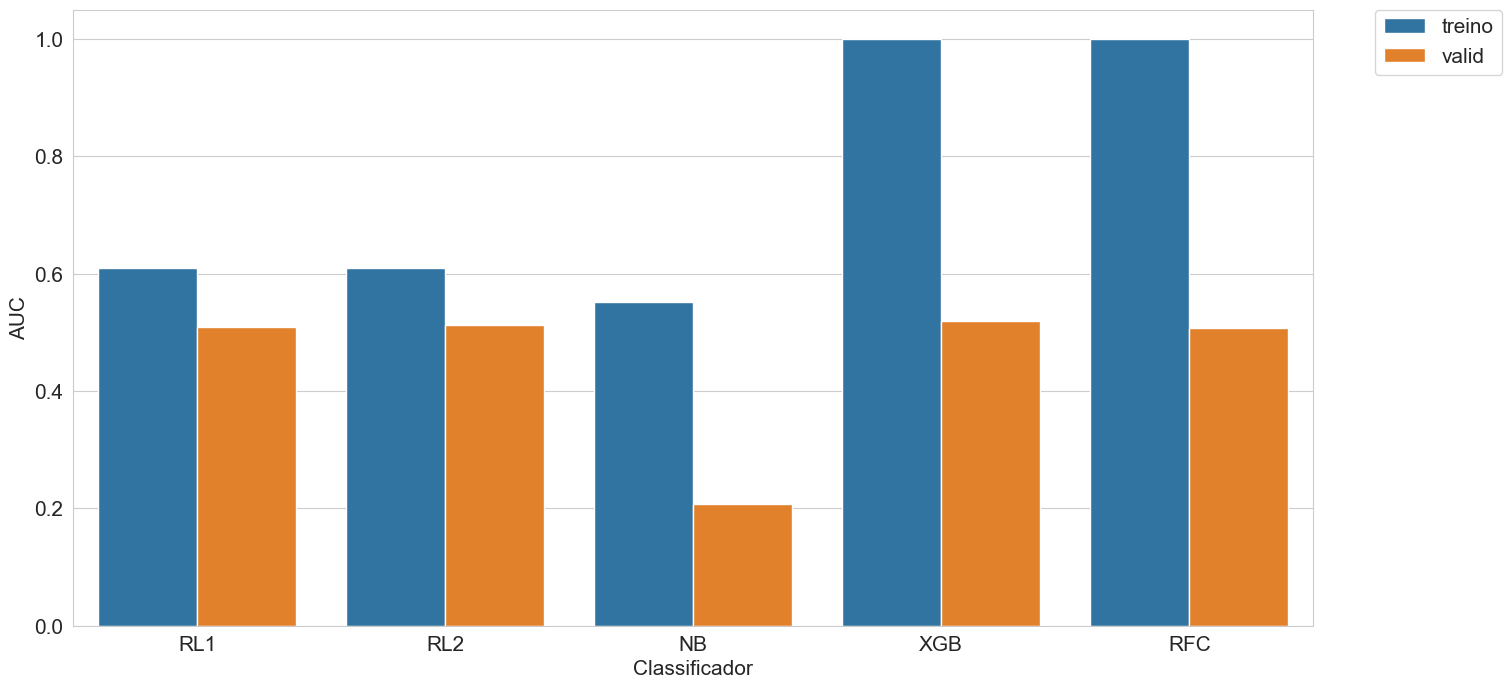

In [85]:
# Construção do Plot
sns.set_style("whitegrid")
plt.figure(figsize = (16, 8))

# Gráfico de barras
ax = sns.barplot(x = 'classificador', y = 'auc', hue = 'data_set', data = results)
ax.set_xlabel('Classificador', fontsize = 15)
ax.set_ylabel('AUC', fontsize = 15)
ax.tick_params(labelsize = 15)

# Legenda
plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0., fontsize = 15)

#### Otimização de parâmetros e Validação Cruzada

In [ ]:
%%time

# Importa a função GridSearchCV
from sklearn.model_selection import GridSearchCV

# Defina o espaço de busca dos hiperparâmetros
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Cria o classificador com RandomForest
classificador = RandomForestClassifier()

# Configura o GridSearchCV
grid_search = GridSearchCV(estimator = classificador, 
                           param_grid = param_grid, 
                           cv = 5, 
                           scoring = 'roc_auc', 
                           verbose = 2, 
                           n_jobs = -1)

# Treina o modelo com validação cruzada e busca pelos melhores hiperparâmetros
model_v5_otimizado = grid_search.fit(X_treino_tf, y_treino)

# Melhores hiperparâmetros encontrados
print('Melhores hiperparâmetros:', model_v5_otimizado.best_params_)

# Previsões
y_train_preds = model_v5_otimizado.predict_proba(X_treino_tf)[:,1]
y_valid_preds = model_v5_otimizado.predict_proba(X_valid_tf)[:,1]

print('Modelo Random Forest Classifier com Otimização de Hiperparâmetros e Validação Cruzada:\n')

print('Treinamento:\n')
rfc_train_auc, rfc_train_accuracy, rfc_train_recall, rfc_train_precision, rfc_train_specificity = print_report(y_treino, 
                                                                                                                   y_train_preds, 
                                                                                                                   thresh)

print('Validação:\n')
rfc_valid_auc, rfc_valid_accuracy, rfc_valid_recall, rfc_valid_precision, rfc_valid_specificity = print_report(y_valid, 
                                                                                                                   y_valid_preds, 
                                                                                                                   thresh)

#### Modelo Escolhido

O modelo RandomForest sem otimização de hiperparâmetros foi escolhido pois é mais simples e requer menos tempo de treinamento.

Modelo RandomForest "Vanilla":

Validação:

- AUC:0.993
- Acurácia:0.958
- Recall:0.977
- Precisão:0.838
- Especificidade:0.951
 

Modelo RandomForest Otimizado:

Validação:

- AUC:0.993
- Acurácia:0.961
- Recall:0.980
- Precisão:0.846
- Especificidade:0.956

Ambos os modelos com RandomForest apresentam desempenho muito alto, mas há algumas nuances a serem consideradas ao escolher qual deles usar:

**Desempenho na validação**: O modelo com otimização de hiperparâmetros tem uma AUC ligeiramente maior na validação, o que indica que ele pode generalizar um pouco melhor. No entanto, outras métricas são um pouco menores nesse modelo. Essas diferenças são pequenas e podem não ser significativas, dependendo do contexto e da importância relativa dessas métricas para o seu problema específico.

**Complexidade e tempo de treinamento**: A otimização de hiperparâmetros aumenta a complexidade do processo de treinamento e o tempo necessário para treinar o modelo. Se o tempo de treinamento for uma preocupação e as diferenças de desempenho forem consideradas insignificantes, você pode optar pelo modelo sem otimização de hiperparâmetros.

##### Avaliação do Modelo Random Forest (sem imperparâmetros)

In [86]:
# Cria matrizes x e y

# X
X_train = data_treino[columns_entry].values
X_valid = data_valid[columns_entry].values
X_test = data_teste[columns_entry].values

# Y
y_train = data_treino['LABEL_TARGET'].values
y_valid = data_valid['LABEL_TARGET'].values
y_test = data_teste['LABEL_TARGET'].values

In [87]:
# Aplica a transformação nos dados
X_train_tf = scaler.transform(X_train)
X_valid_tf = scaler.transform(X_valid)
X_test_tf = scaler.transform(X_test)

In [88]:
# Previsões de probabilidade
y_train_preds = model_v5.predict_proba(X_train_tf)[:,1]
y_valid_preds = model_v5.predict_proba(X_valid_tf)[:,1]
y_test_preds = model_v5.predict_proba(X_test_tf)[:,1]

In [89]:
thresh = 0.5


In [90]:

print('\nTreinamento:\n')
train_auc, train_accuracy, train_recall, train_precision, train_specificity = print_report(y_train,
                                                                                               y_train_preds, 
                                                                                               thresh)

print('\nValidação:\n')
valid_auc, valid_accuracy, valid_recall, valid_precision, valid_specificity = print_report(y_valid,
                                                                                               y_valid_preds, 
                                                                                               thresh)

print('\nTeste:\n')
test_auc, test_accuracy, test_recall, test_precision, test_specificity = print_report(y_test,
                                                                                          y_test_preds, 
                                                                                          thresh)


Treinamento:

AUC:0.501
Acurácia:0.537
Recall:0.500
Precisão:0.214
Especificidade:0.507
 

Validação:

AUC:0.507
Acurácia:0.530
Recall:0.450
Precisão:0.190
Especificidade:0.506
 

Teste:

AUC:0.531
Acurácia:0.533
Recall:0.467
Precisão:0.224
Especificidade:0.501
 


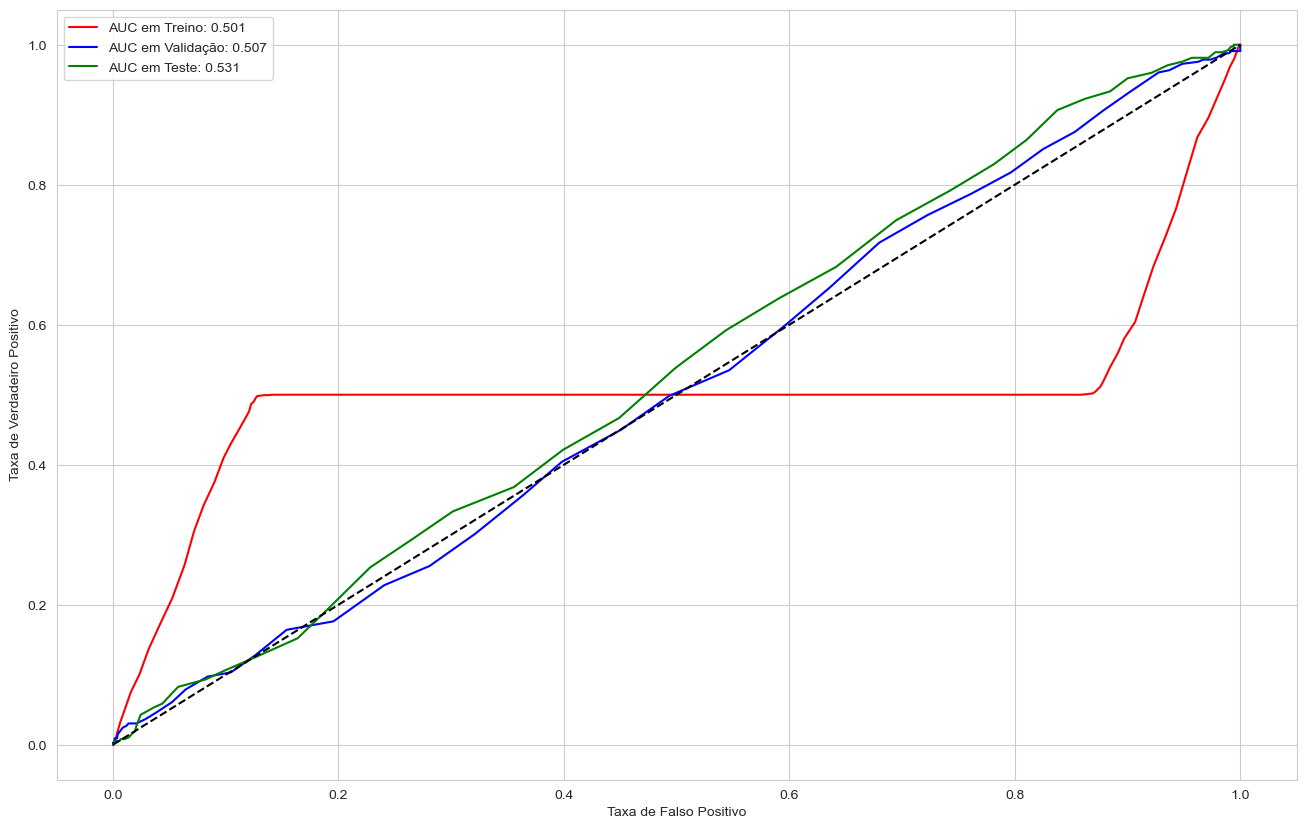

In [91]:
# Calcula a curva ROC nos dados de treino
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_preds)
auc_train = roc_auc_score(y_train, y_train_preds)

# Calcula a curva ROC nos dados de validação
fpr_valid, tpr_valid, thresholds_valid = roc_curve(y_valid, y_valid_preds)
auc_valid = roc_auc_score(y_valid, y_valid_preds)

# Calcula a curva ROC nos dados de teste
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_preds)
auc_test = roc_auc_score(y_test, y_test_preds)

# Plot
plt.figure(figsize=(16,10))
plt.plot(fpr_train, tpr_train, 'r-', label = 'AUC em Treino: %.3f'%auc_train)
plt.plot(fpr_valid, tpr_valid, 'b-', label = 'AUC em Validação: %.3f'%auc_valid)
plt.plot(fpr_test, tpr_test, 'g-', label = 'AUC em Teste: %.3f'%auc_test)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.legend()
plt.show()

#### Deploy

In [92]:
new_customer = pd.read_csv('novo_cliente.csv')

In [93]:
new_customer.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178
0,42,53,44,31,15,12,6,4,1,-4,...,-41,-16,2,22,33,45,56,67,69,63


In [94]:
new_customer_scaled = scaler.transform(new_customer)

In [95]:
new_customer_scaled

array([[ 0.23939954,  0.27739936,  0.23640124,  0.17064424,  0.08620508,
         0.05628754,  0.02098463,  0.01391761,  0.00079634, -0.02193853,
        -0.06038925, -0.08497798, -0.08813146, -0.07839046, -0.05665015,
        -0.048214  , -0.05353205, -0.06820024, -0.05751507, -0.05202398,
        -0.06714414, -0.03633367, -0.00321669,  0.0135653 ,  0.00646273,
         0.00323907,  0.02433067,  0.0467804 ,  0.07637231,  0.07439524,
         0.06260801,  0.02001956,  0.01275423,  0.00238302,  0.02559613,
         0.0508036 ,  0.08565998,  0.12229535,  0.13601243,  0.16923028,
         0.17731895,  0.1927828 ,  0.1859316 ,  0.2062473 ,  0.20409432,
         0.19796391,  0.1872069 ,  0.14601653,  0.08607467,  0.03700693,
         0.01681966, -0.0457648 , -0.10645941, -0.15261651, -0.17568853,
        -0.18677558, -0.18348548, -0.17803569, -0.1713881 , -0.13740818,
        -0.10198774, -0.06497354, -0.0298109 , -0.04708175, -0.03414973,
        -0.02412061, -0.0047987 ,  0.04531926,  0.0

In [96]:
model_v5.predict_log_proba(new_customer_scaled)

array([[-0.56211892, -0.84397007]])

In [97]:
model_v5.predict(new_customer_scaled)

array([0])

De acordo com a previsão do modelo, esse cliente vai fazer a renovação do seguro.